<h1>Tesla and GameStop Stock Data Analysis and Visualization</h1>
<h2>Project Description</h2>


This project focuses on the extraction, analysis, and visualization of stock data for two notable companies: Tesla and GameStop. The analysis is divided into multiple sections, addressing different aspects of handling stock data, from fetching raw data to web scraping financial figures, and finally visualizing the data using Python libraries.

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Data</li>
        <li>Using Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Using yfinance to Extract Stock Data</li>
        <li>Using Webscraping to Extract GME Revenue Data</li>
        <li>Plotting Tesla Stock Graph</li>
        <li>Plotting GameStop Stock Graph</li>
    </ul>
<p>
</div>

<hr>


In [48]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [25]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Defining Graphing Function


In [26]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Using yfinance to Extract Stock Data

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.

In [27]:
tesla_data = yf.Ticker("TSLA")

In [28]:
tesla_data = tesla_data.history(period="max")

In [29]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Using Webscraping to Extract Tesla Revenue Data


Using the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.

In [30]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

In [31]:
soup = BeautifulSoup(html_data, 'html.parser')

In [32]:
tables = soup.find_all('table')
tesla_revenue_table = tables[1]
rows = tesla_revenue_table.find_all('tr')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [33]:
for row in rows[1:]:  
    cols = row.find_all('td')
    date = cols[0].text.strip()  
    revenue = cols[1].text.replace('$', '').replace(',', '').strip()  
    if revenue != "":  
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [34]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [35]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


## Using yfinance to Extract Stock Data


In [36]:
gme_ticker = yf.Ticker("GME")

In [37]:
gme_data = gme_ticker.history(period="max")

In [38]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Using Webscraping to Extract GME Revenue Data


In [39]:
html_data_2 = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text

In [40]:
soup_2 = BeautifulSoup(html_data_2, 'html.parser')

In [41]:
gme_revenue = pd.read_html(str(soup_2))[1]
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

In [42]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Plotting Tesla Stock Graph


Using the `make_graph` function to graph the Tesla Stock Data upto June 2021.


In [43]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data (up to June 2021)')

## Plotting GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock data upto June 2021.


In [44]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data (up to June 2021)')

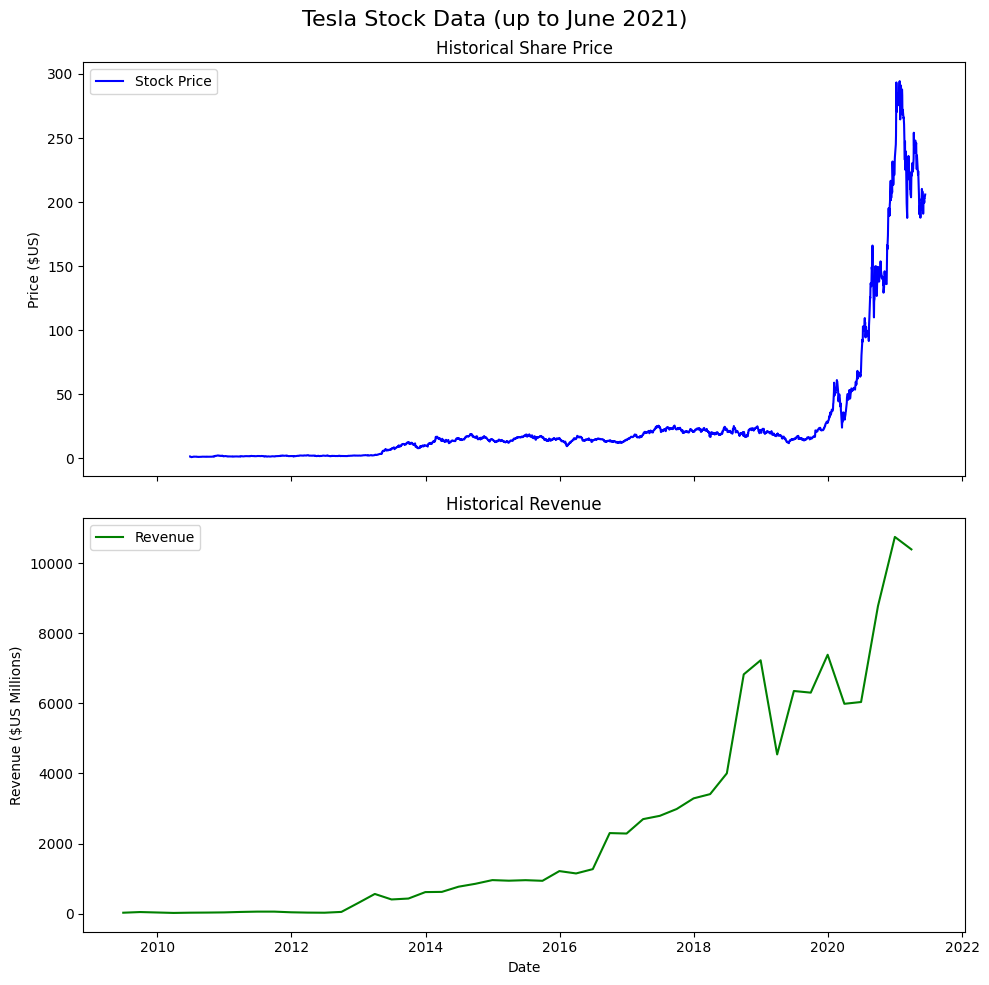

In [49]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_data_specific = tesla_data[tesla_data['Date'] <= '2021-06-14']
tesla_revenue_specific = tesla_revenue[tesla_revenue['Date'] <= '2021-04-30']
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax[0].plot(tesla_data_specific['Date'], tesla_data_specific['Close'], label='Stock Price', color='blue')
ax[0].set_title('Historical Share Price')
ax[0].set_ylabel('Price ($US)')
ax[0].legend()
ax[1].plot(tesla_revenue_specific['Date'], tesla_revenue_specific['Revenue'].astype(float), label='Revenue', color='green')
ax[1].set_title('Historical Revenue')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Revenue ($US Millions)')
ax[1].legend()

fig.suptitle('Tesla Stock Data (up to June 2021)', fontsize=16)
plt.tight_layout()
plt.show()

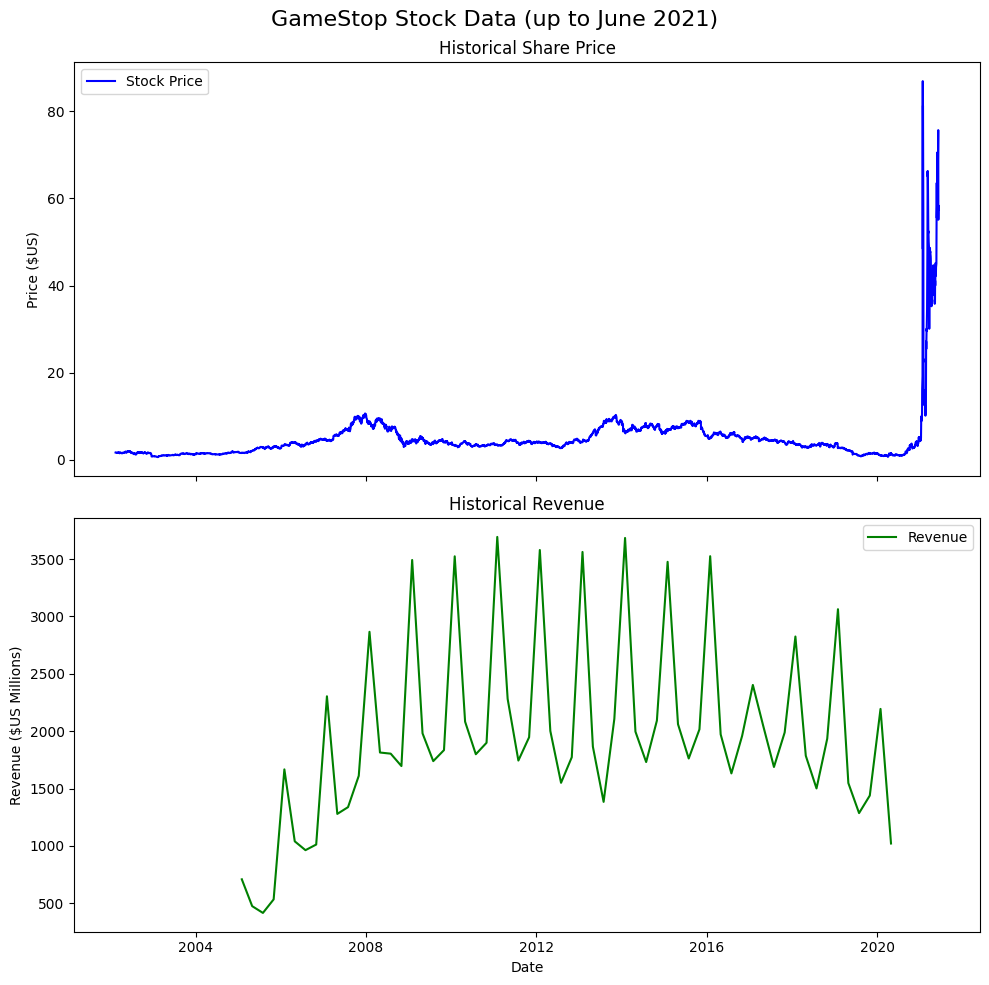

In [50]:
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_data_specific = gme_data[gme_data['Date'] <= '2021-06-14']
gme_revenue_specific = gme_revenue[gme_revenue['Date'] <= '2021-04-30']

fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax[0].plot(gme_data_specific['Date'], gme_data_specific['Close'], label='Stock Price', color='blue')
ax[0].set_title('Historical Share Price')
ax[0].set_ylabel('Price ($US)')
ax[0].legend()
ax[1].plot(gme_revenue_specific['Date'], gme_revenue_specific['Revenue'].astype(float), label='Revenue', color='green')
ax[1].set_title('Historical Revenue')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Revenue ($US Millions)')
ax[1].legend()

fig.suptitle('GameStop Stock Data (up to June 2021)', fontsize=16)
plt.tight_layout()
plt.show()